# P4. Visualising datasets as contour and vector plots

## Practical Notebook 4 (of 6) for *Intro to the NCAS CF Data Tools, cf-python and cf-plot*

**In this section we demonstrate how to plot using cf-plot the data we have read and then processed and/or analysed using cf-python, notably showing how to create contour plots and vector plots as examples of some of the available plot types.**

***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> run the cell in this section to do the set up, which is not part of the practical proper.
</div>

## Setting up

**In this short prelude we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries and the data (exactly as per the first Notebook setup but in one cell only for quick execution).**

In [1]:
# Set up for inline plots - only needed inside a Notebook environment - and to ignore some repeating warnings
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Import the two CF Data Tools libraries and inspect the versions
import cfplot as cfp
import cf
print("--- Version report: ---")
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

# See what datasets we have to explore within the data directory we use throughout this course
print("--- Datasets available from the path '../data': ---")
# Note that in a Jupyter Notebook, '!' precedes a shell command - so this is a command, not Python
!ls ../data

--- Version report: ---
cf-python version is: 3.18.1
cf-plot version is: 3.4.0
CF Conventions version is: 1.12
--- Datasets available from the path '../data': ---
160by320griddata.nc			   precip_2010.nc
aaaaoa.pmh8dec.pp			   precip_DJF_means.nc
alpine_precip_DJF_means.nc		   qbo.nc
data1.nc				   regions.nc
data1-updated.nc			   rgp.nc
data2.nc				   sea_currents_backup.nc
data3.nc				   sea_currents.nc
data5.nc				   ta.nc
ggas2014121200_00-18.nc			   tripolar.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  two_fields.nc
land.nc					   ua.nc
model_precip_DJF_means_low_res.nc	   u_n216.nc
model_precip_DJF_means.nc		   u_n96.nc
n2o_emissions.nc			   vaAMIPlcd_DJF.nc
POLCOMS_WAM_ZUV_01_16012006.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc
precip_1D_yearly.nc


***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> now we can start the practical. We will follow the same sectioning as in the teaching notebook, so please consult the notes there in the matching section for guidance and you can also consult the cf-python and cf-plot documentation linked above.
</div>

## 4. Visualising datasets as contour and vector plots

### a) Making a contour plot

**4.a.1)** Read in the file `alpine_precip_DJF_means.nc` which is in the `../data` directory and assign the first field it contains to a variable called `field`. Inspect that field with medium detail level.

In [2]:
field = cf.read("../data/alpine_precip_DJF_means.nc")[0]
print(field)

Field: long_name=PRECIPITATION (ncvar%PRECIPITATION)
----------------------------------------------------
Data            : long_name=PRECIPITATION(projection_y_coordinate(138), projection_x_coordinate(243)) mm.d-1
Cell methods    : axis=T(1): mean
Dimension coords: projection_y_coordinate(138) = [2210000.0, ..., 2895000.0] meters
                : projection_x_coordinate(243) = [3675000.0, ..., 4885000.0] meters
                : axis=T(1) = [1996-07-15 12:00:00] standard
Auxiliary coords: longitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[2.1252150535583496, ..., 17.706647872924805]] degrees_east
                : latitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[42.69166564941406, ..., 48.90237045288086]] degrees_north
Coord references: grid_mapping_name:lambert_azimuthal_equal_area


**4.a.2)** Make a contour plot of the field, noting that because it is already 2D over X and Y axes corresponding to its projection so it can be plotted directly, without any need to reduce via subspacing or collapsing. Just get a plot working - there is no need to customise it yet.

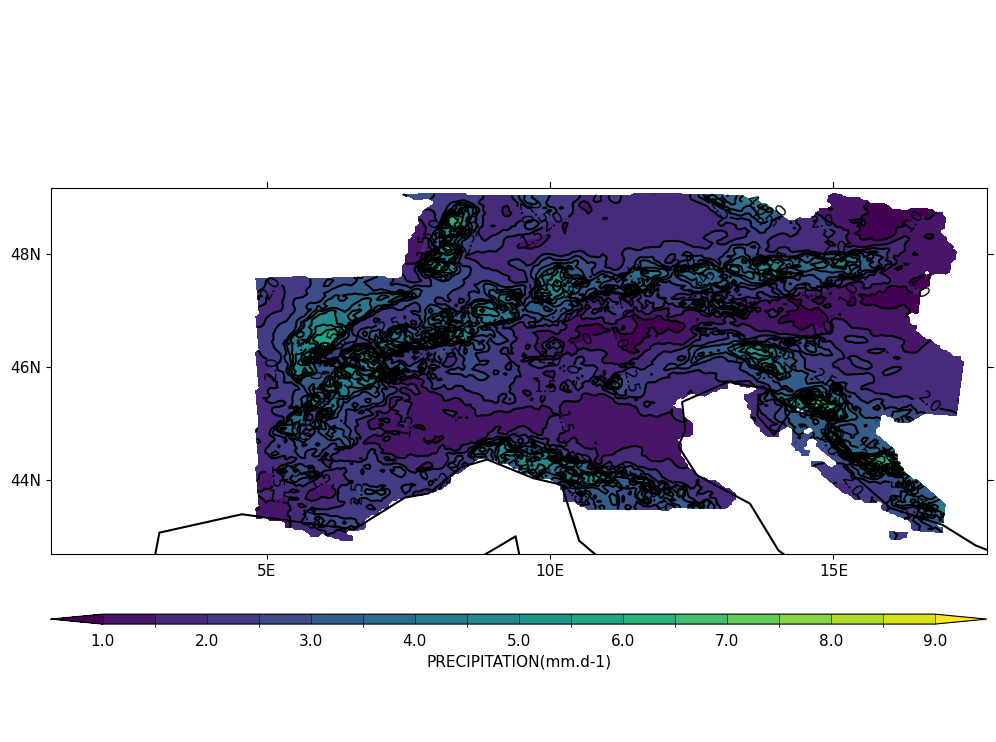

In [3]:
cfp.con(field)

### b) Customising the (contour) plot

**4.b.1)** Customise the contour plot made in section (4a) to remove the contour lines by running the same call with a new argument set appropriately.

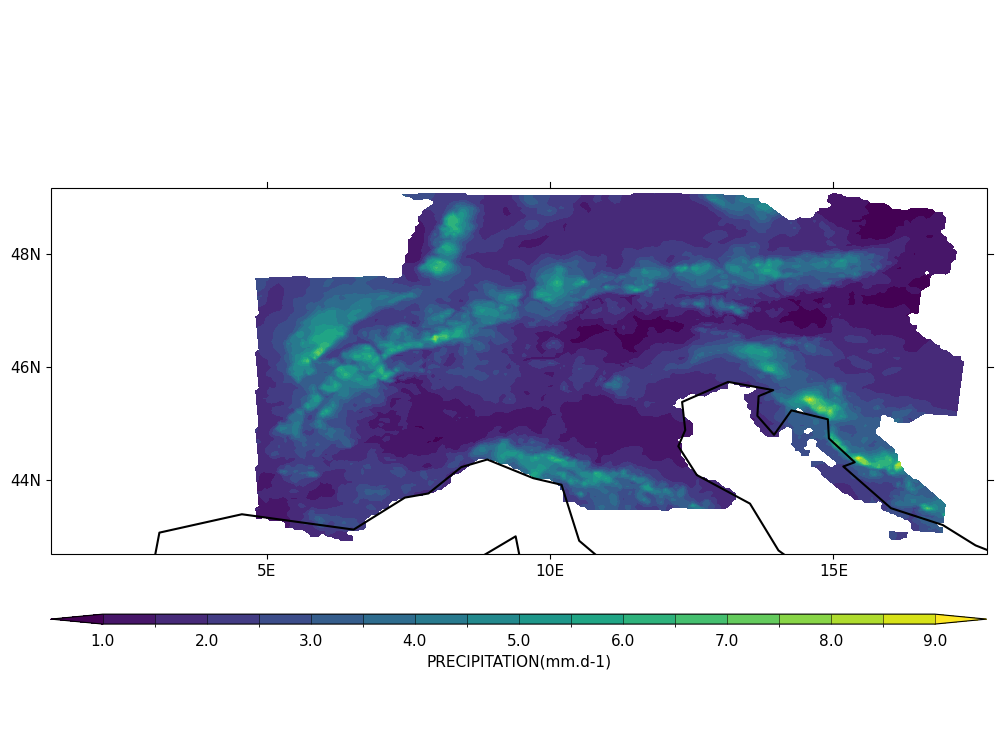

In [4]:
cfp.con(field, lines=False)

**4.b.2)** Customise the contour plot further so, as well as having the contour lines removed as applied above, it is shown using a different colour map to the default colour map, 'viridis'. You can use the link https://ncas-cms.github.io/cf-plot/build/colour_scales.html#colour-scales to explore the different options.

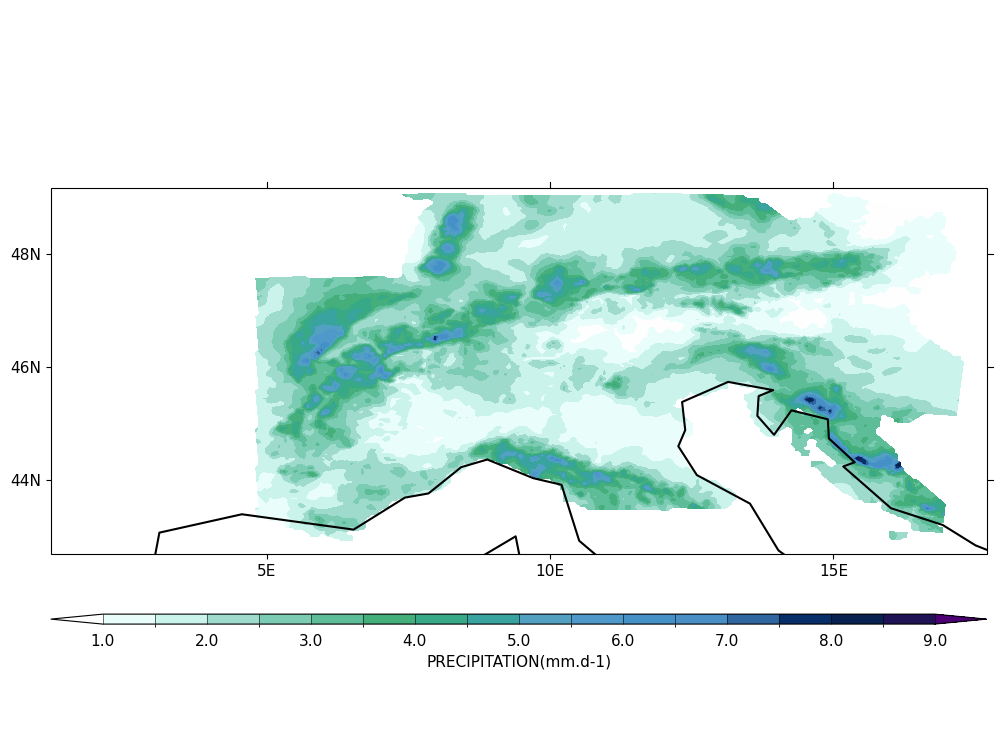

In [5]:
cfp.cscale("precip4_11lev")  # or another choice of valid colour map string argument
cfp.con(field, lines=False)

**4.b.3)** Customise the contour plot further so, as well as having the altered colour map as applied above, it is shown in the 'EuroPP' projection, which has a string identifier of 'EuroPP'. Note this is a special Europe-specific projection so it will focus the plot in on the whole European area without us having specified to change the visualised plot area by subspacing down the X and Y coordinates further or by setting plotting limits using `mapset`. Also add the argument and value `resolution="10m"` to the call to `mapset`, which will increase the resolution of the country borders.

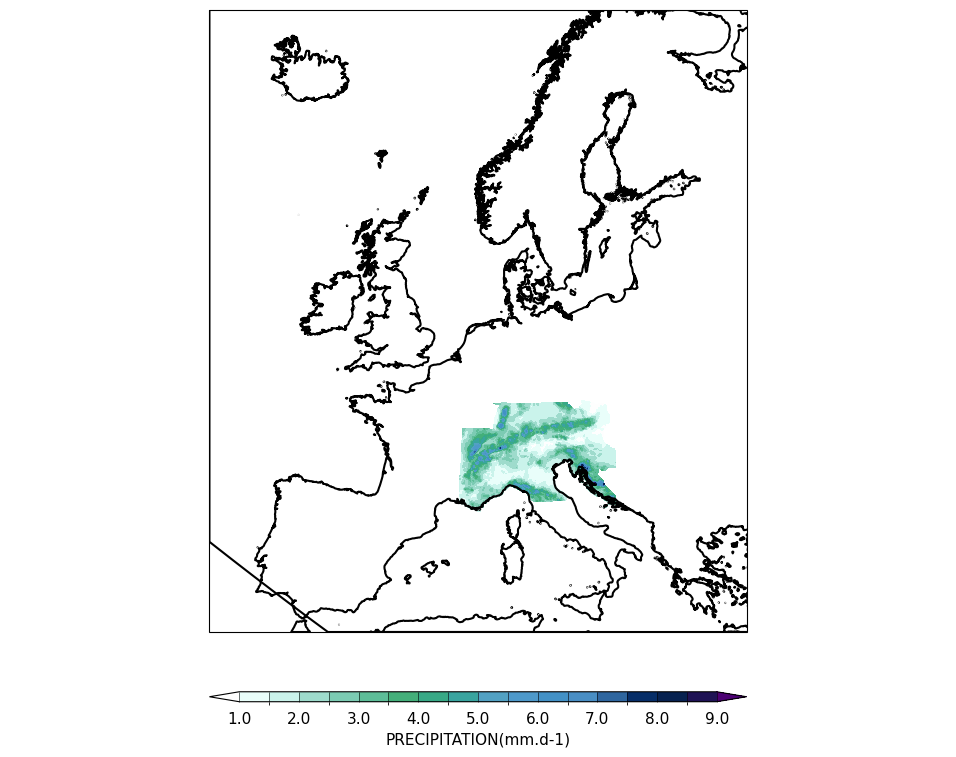

In [6]:
cfp.mapset(proj="EuroPP", resolution="10m")
cfp.con(field, lines=False)

**4.b.4)** Customise the contour plot further so that it focuses in on a smaller region over the Alps, specifically from longitude of 5 to 10 degrees east and from latitude of 45 to 47 degrees. Note, a call to `mapset` will reset any of the previous calls, so you will need to re-apply previous arguments to it that you want to preserve for future plots - don't specify the 'EuroPP' projection again else its special X and Y plot limits will override the ones directly set.

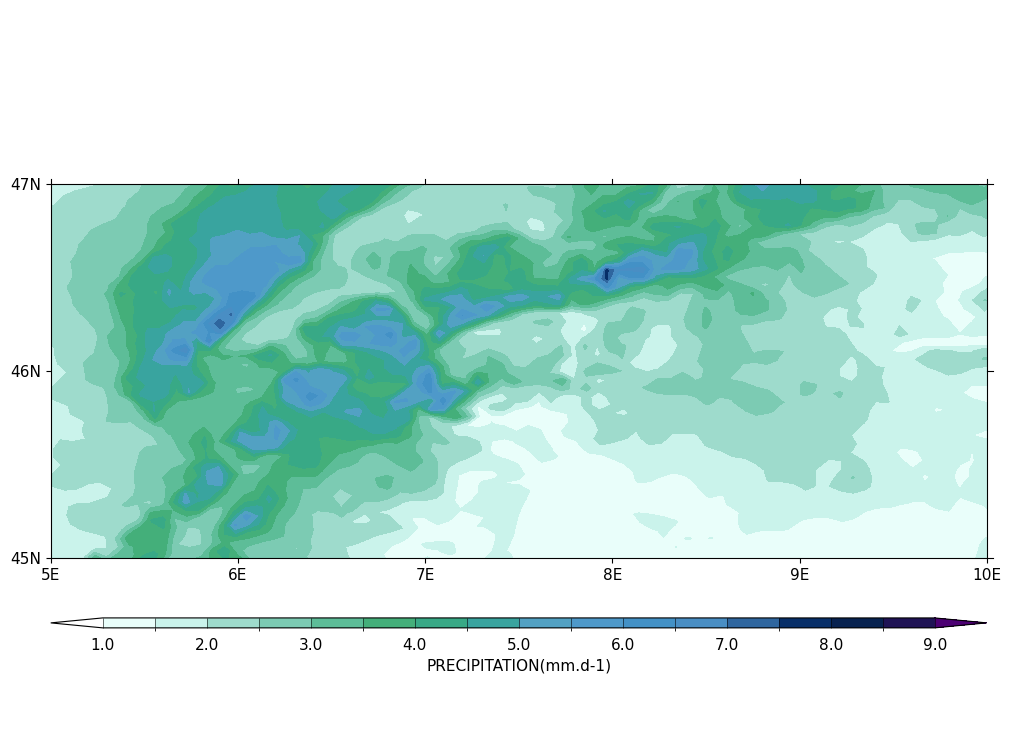

In [7]:
cfp.mapset(lonmin=5, lonmax=10, latmin=45, latmax=47, resolution="10m")
cfp.con(field, lines=False)

### c) Making a vector plot with basic customisation

**4.c.1)** Read in the netCDF file `sea_currents.nc` stored in the usual directory, `../data`, assigning it to a variable `irish_sea_fieldlist` and inspect it with medium detail.

In [8]:
irish_sea_fieldlist = cf.read("../data/sea_currents.nc")
print(irish_sea_fieldlist)

[<CF Field: eastward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>,
 <CF Field: northward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>,
 <CF Field: sea_surface_height_above_sea_level(time (1), latitude(301), longitude(173)) m>]


**4.c.2)** Note that the first two fieds represent perpendicular components of the same directional variable for sea water velocity. The first field is the eastward and the second field is the northward, component of this.

In order to ensure they are compatible to plot together as vectors, we first need to ensure they are defined on the same gridpoints - in cf-python (from CF Data Model) terminology, we say they need to have the same *domain*. Assign to variable names 'eastward_component_field' and 'northward_component_field' the first and second fields respectively, and inspect them with minimal detail as a first step check to see if there is the same number of axes and points along each upon which the data is defined (there are two code blocks here, one for each field since when you inspect with minimal detail it will only show if it is the final call in the cell).

In [9]:
eastward_component_field = irish_sea_fieldlist[0]
eastward_component_field

<CF Field: eastward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>

In [10]:
northward_component_field = irish_sea_fieldlist[1]
northward_component_field

<CF Field: northward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>

**4.c.3)** You should be able to see from the metadata that the two fields are perpendicular components of the same wind field. But, for us to be sure these represent components of the same vector field, we need to check that they are defined at the same grid points - else the components are defined at different location points in space and therefore can't be combined into a single vector. In cf-python we call the locations that the data is representative of the *domain*.

We can check whether the two fields have the same domain by taking the `domain` attribute of each field and comparing those using the `equals` method, e.g. `field1.domain.equals(field2.domain)` for fields `field1` and `field2`. Do this for the two fields we defined in the pair of cells above.

In [11]:
eastward_component_field.domain.equals(northward_component_field.domain)

True

**4.c.4)** We know now that the fields are the same variable, with perpendicular northward and eastward components, with the same domain i.e. defined on the same gridpoints. This means they are compatible vector components and can be plotted together to form a vector plot for the variable in question, the sea water velocity. However, we currently have the time coordinate with more than one point, so we need to reduce both fields down in the correpsonding way to get a particular 2D plot.

Let's take the final time point in the series of both of these fields to plot. Subspace both fields down in time to that final time axis point, using indexing - using section (3b) for a reminder about subspacing by index if you need guiance.

In [12]:
eastward_component_field_last_time = eastward_component_field[-1, :, :, :]
print(eastward_component_field_last_time)

Field: eastward_sea_water_velocity (ncvar%u)
--------------------------------------------
Data            : eastward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1
Cell methods    : ocean_sigma_coordinate(1): mean
Dimension coords: time (1) = [2006-01-01 00:30:00]
                : ocean_sigma_coordinate(1) = [-0.5] 1
                : latitude(301) = [51.0, ..., 56.0] degrees_north
                : longitude(173) = [-7.0, ..., -2.700000047683716] degrees_east


In [13]:
northward_component_field_last_time = northward_component_field[-1, :, :, :]
print(northward_component_field_last_time)

Field: northward_sea_water_velocity (ncvar%v)
---------------------------------------------
Data            : northward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1
Cell methods    : ocean_sigma_coordinate(1): mean
Dimension coords: time (1) = [2006-01-01 00:30:00]
                : ocean_sigma_coordinate(1) = [-0.5] 1
                : latitude(301) = [51.0, ..., 56.0] degrees_north
                : longitude(173) = [-7.0, ..., -2.700000047683716] degrees_east


**4.c.5)** Make a vector plot using the two subspaced component fields you found and defined in the previous section to form the corresponding vectors. Do not worry about customising it yet, just get a plot working even if the vectors are not optimised for readability, however do run `cfp.mapset(resolution="10m")` before you make the call to make the vector plot to reset the X and Y limits we specified in the previous section.

Note that the `u` keyword argument is for eastward vector components and the `v` keyword argument is for northward vector components.

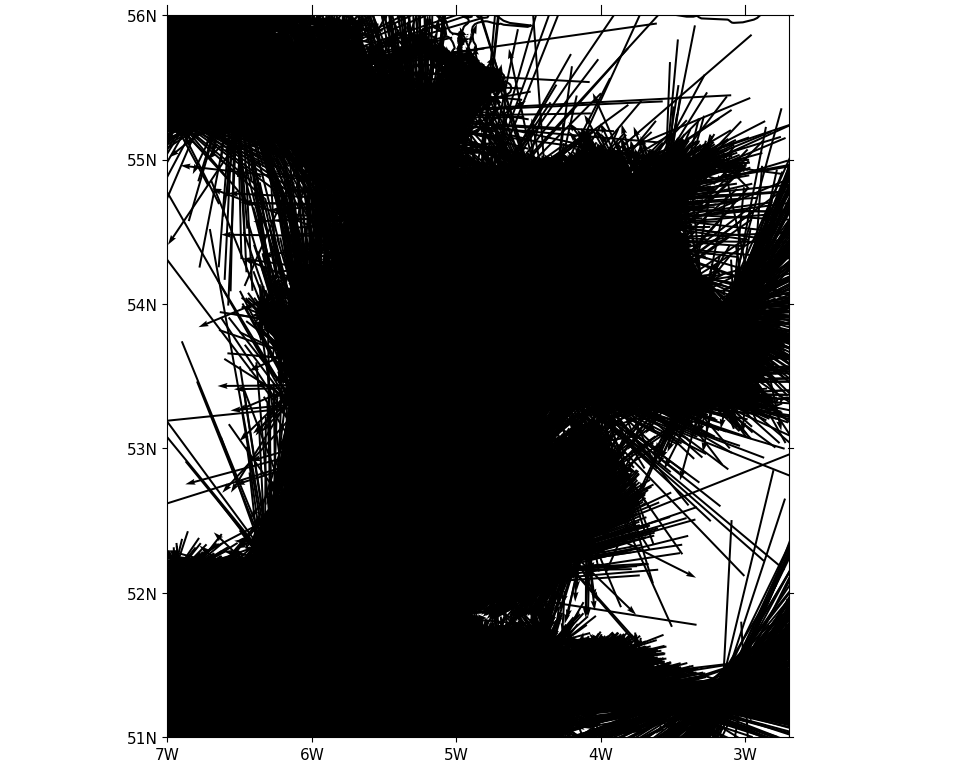

In [14]:
cfp.mapset(resolution="10m")
cfp.vect(u=eastward_component_field_last_time, v=northward_component_field_last_time)

**4.c.6)** Customise the plot you just made, in particular so that the vector lines are legible through adjusting the spacing and size at which they are plotted. This usually takes some trial and error - guess some values for the keyword argument values and increase or decrease them until you find a good balance so the vector lines can be distinguished and clearly interpreted.

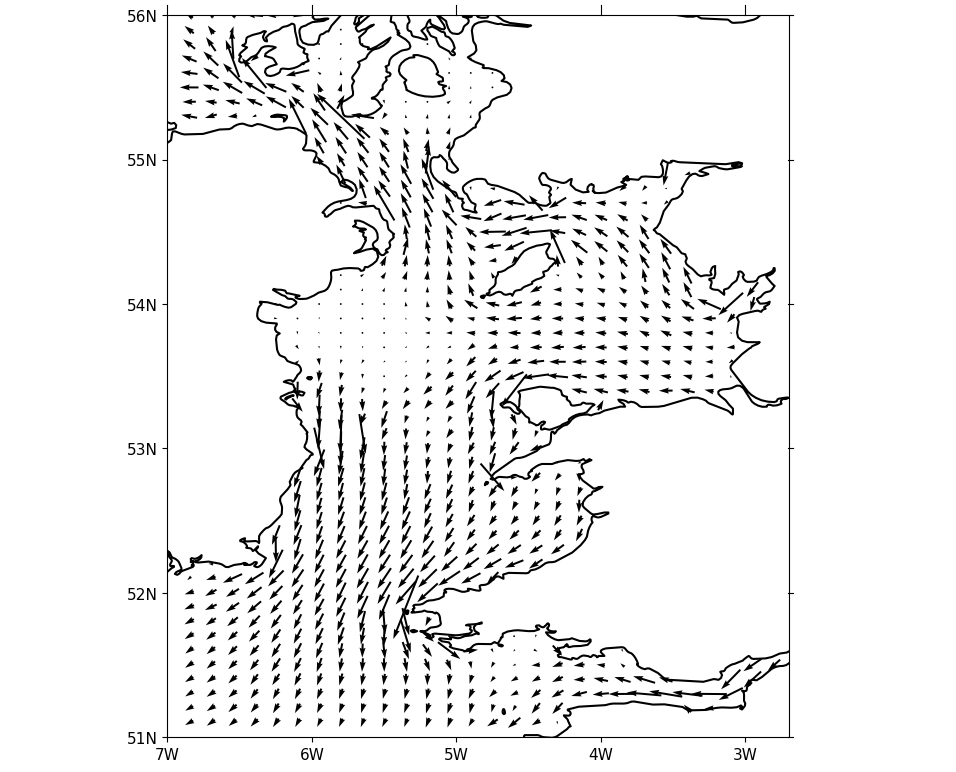

In [15]:
cfp.mapset(resolution="10m")
cfp.vect(u=eastward_component_field_last_time, v=northward_component_field_last_time, scale=3, stride=6)

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> this is the end of the section. Please check your work, review the material and then move on to Practical 5 (see the Notebook 'cf_data_tools_practical_05.ipynb').
</div>

***